# Notebook de Detecção de Fraude em Cartões de Crédito
## Autor: Gabriel Menegueli

# Etapa 1: Carregando e visualizando os dados
Vou começar carregando os dados e mostrando algumas informações básicas sobre eles.

In [12]:
# Links para as bibliotecas usadas:
# - pandas: https://pandas.pydata.org/
# - numpy: https://numpy.org/
# - matplotlib: https://matplotlib.org/
# - seaborn: https://seaborn.pydata.org/
# - scikit-learn: https://scikit-learn.org/stable/

### Etapa 1: Carregando e visualizando os dados

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Carregando o dataset
df = pd.read_csv('./data/creditcard.csv')

# Exibindo as primeiras linhas do dataset para entender sua estrutura
print("Visualizando as primeiras linhas do dataset:")
display(df.head())

# Exibindo informações gerais sobre o dataset (número de entradas, colunas, tipos de dados, valores nulos, etc.)
print("\nInformações gerais sobre o dataset:")
df.info()

# Exibindo estatísticas descritivas do dataset
print("\nEstatísticas descritivas do dataset:")
display(df.describe())

Visualizando as primeiras linhas do dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Etapa 2: Análise Exploratória de Dados (EDA)
Nessa etapa, faremos uma análise exploratória dos dados para entender melhor as características do dataset, como a distribuição das classes (fraude/não fraude), correlações entre as variáveis, entre outros aspectos.

Distribuição das classes:
Class
0    284315
1       492
Name: count, dtype: int64


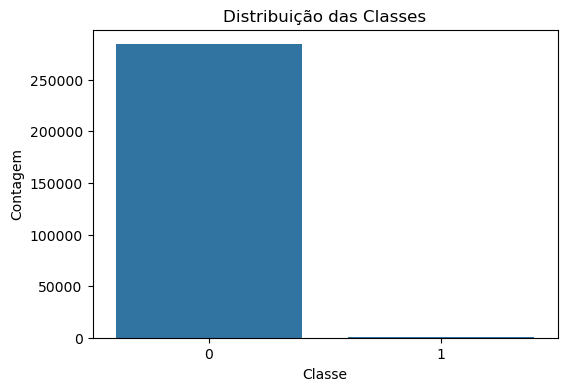

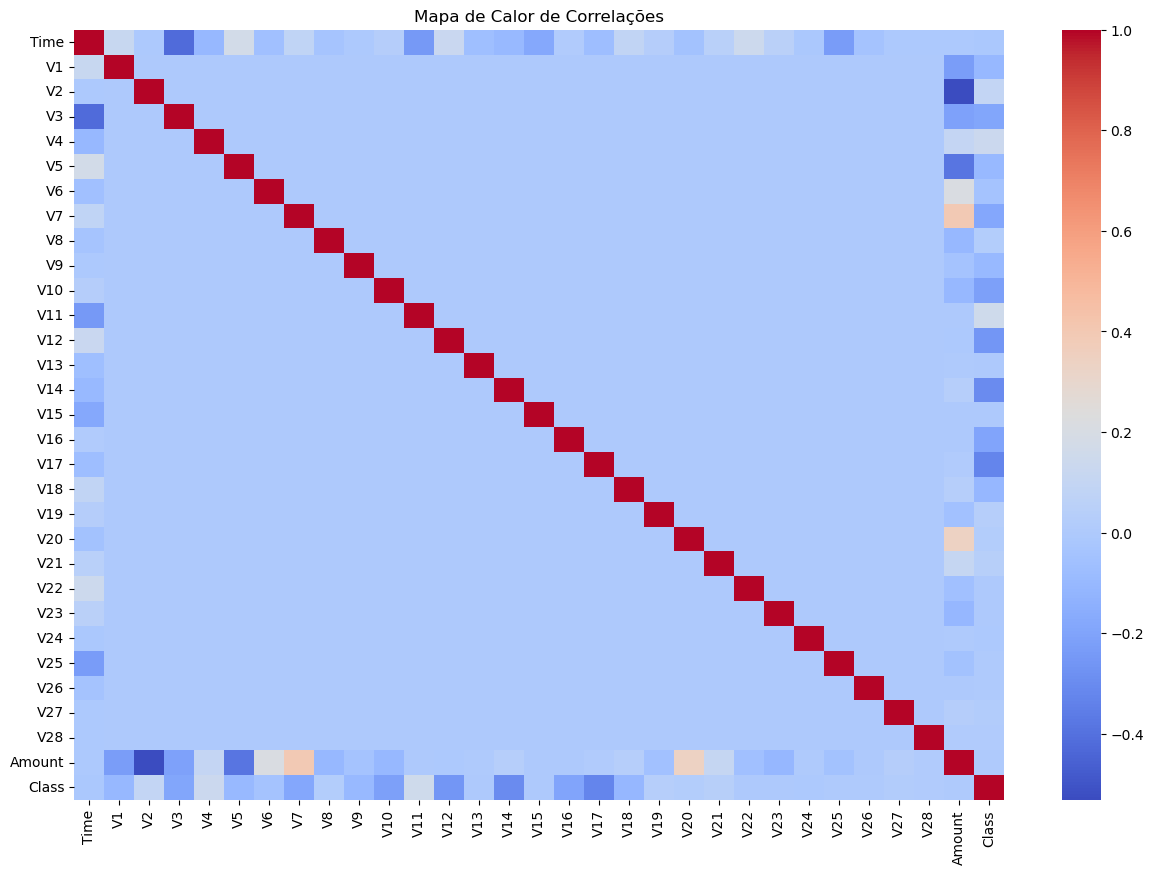

In [19]:
# Verificando a distribuição das classes (fraude vs. não fraude)
print("Distribuição das classes:")
print(df['Class'].value_counts())

# Plotando a distribuição das classes
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Verificando correlações entre as variáveis
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Mapa de Calor de Correlações')
plt.show()

# Insights:
# - Podemos observar que a classe está bastante desbalanceada, com muitas mais transações não fraudulentas do que fraudulentas.
# - O mapa de calor pode nos ajudar a identificar quais variáveis têm correlações fortes entre si, o que pode ser útil na construção de modelos.


# Etapa 3: Preparação dos Dados
Agora vamos preparar os dados para o modelo de machine learning, o que inclui tratar valores nulos, normalizar/transformar variáveis, e dividir os dados em conjuntos de treino e teste.

In [22]:
# Verificando valores nulos
print("Verificando valores nulos no dataset:")
print(df.isnull().sum())

# Normalizando as variáveis de tempo e valor da transação (se necessário)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Removendo as colunas originais 'Time' e 'Amount'
df = df.drop(['Time', 'Amount'], axis=1)

# Dividindo o dataset em features (X) e target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Dividindo os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Conjuntos de treino e teste criados.")


Verificando valores nulos no dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Conjuntos de treino e teste criados.


# Etapa 4: Treinamento do Modelo
Aqui, treinaremos um modelo simples de machine learning, como uma Regressão Logística, para identificar as transações fraudulentas.

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Acurácia do modelo:
0.9992743700478681


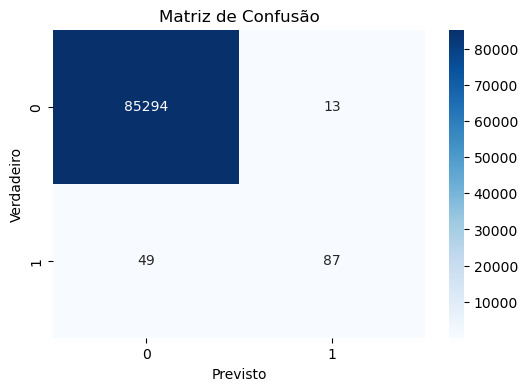

In [25]:
### Etapa 4: Treinamento do Modelo

# Importando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

print("Acurácia do modelo:")
print(accuracy_score(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Insights:
# - A acurácia é uma métrica importante, mas como as classes estão desbalanceadas, é crucial olhar para outras métricas como precisão, recall e F1-score.
# - A matriz de confusão ajuda a visualizar quantas fraudes foram corretamente identificadas e quantos falsos positivos e negativos o modelo gerou.


# Etapa 5: Treinamento com Árvores de Decisão

Relatório de classificação - Árvore de Decisão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.83      0.76       136

    accuracy                           1.00     85443
   macro avg       0.85      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Acurácia do modelo - Árvore de Decisão:
0.9991573329588147


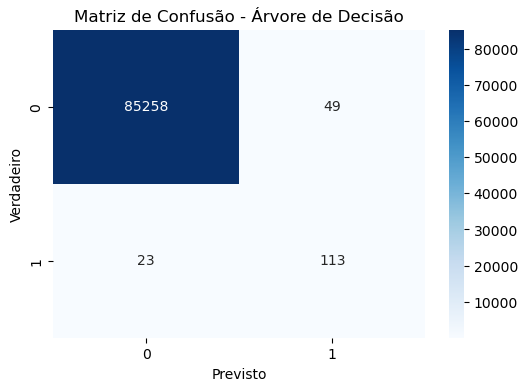

In [28]:
# Importando o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Treinando o modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_tree = tree_model.predict(X_test)

# Avaliando o modelo
print("Relatório de classificação - Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))

print("Acurácia do modelo - Árvore de Decisão:")
print(accuracy_score(y_test, y_pred_tree))

# Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Insights:
# - A Árvore de Decisão pode capturar relações não lineares entre as variáveis, o que pode ser útil em casos de fraude que não seguem padrões simples.
# - Podemos comparar a performance deste modelo com o da Regressão Logística para ver qual se sai melhor.

# Etapa 6: Treinamento com Random Forest

Relatório de classificação - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.80      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Acurácia do modelo - Random Forest:
0.9995786664794073


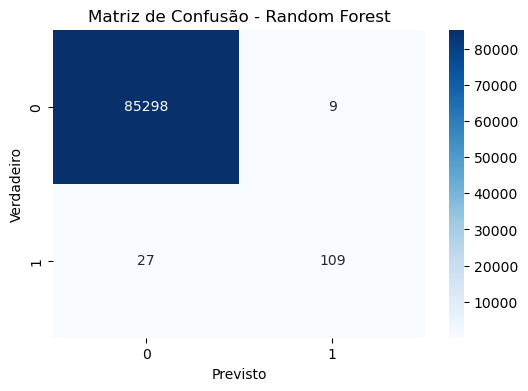

In [31]:
### Etapa 6: Treinamento com Random Forest

# Importando o modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

# Treinando o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo
print("Relatório de classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Acurácia do modelo - Random Forest:")
print(accuracy_score(y_test, y_pred_rf))

# Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Insights:
# - Random Forest é uma melhoria em relação à Árvore de Decisão simples, pois combina múltiplas árvores para melhorar a precisão e reduzir o overfitting.
# - Este modelo é bastante robusto e costuma performar bem em tarefas de classificação, como a detecção de fraudes.


## Conclusão e Próximos Passos

### Como entender os gráficos gerados:

 1. **Relatório de Classificação**: Esse relatório mostra métricas importantes como precisão (precision), recall, e F1-score para cada classe (fraude e não fraude). 
    - **Precisão (Precision)**: Indica a proporção de verdadeiros positivos em relação ao total de previsões positivas feitas pelo modelo. Ou seja, entre as previsões que o modelo fez como "fraude", quantas realmente eram fraudes.
    - **Recall**: Indica a proporção de verdadeiros positivos em relação ao total de casos positivos reais. Ou seja, das fraudes que realmente ocorreram, quantas o modelo conseguiu identificar.
    - **F1-Score**: É a média harmônica entre precisão e recall, sendo útil quando é importante balancear essas duas métricas.

 2. **Matriz de Confusão**: A matriz de confusão mostra quantas previsões o modelo fez corretamente (verdadeiros positivos e verdadeiros negativos) e quantas ele errou (falsos positivos e falsos negativos).
    - **Verdadeiros Positivos (TP)**: O modelo previu "fraude" corretamente.
    - **Falsos Positivos (FP)**: O modelo previu "fraude", mas não era (também chamado de "alarme falso").
    - **Verdadeiros Negativos (TN)**: O modelo previu "não fraude" corretamente.
    - **Falsos Negativos (FN)**: O modelo previu "não fraude", mas era fraude.

 3. **Distribuição das Classes**: Esse gráfico mostra quantas transações são fraudulentas e quantas não são. Como as classes são desbalanceadas (muito mais transações não fraudulentas), isso pode afetar o desempenho do modelo.

 Agora que entendemos os gráficos, vamos resumir os insights finais e discutir os próximos passos.

## Insights finais:
 - Comparando os três modelos (Regressão Logística, Árvore de Decisão, e Random Forest), podemos ver como cada um lida com a tarefa de detecção de fraudes.
 - O Random Forest geralmente oferece um bom equilíbrio entre precisão e capacidade de generalização, tornando-o uma escolha popular em ambientes bancários.
 - É importante lembrar que a escolha do modelo ideal pode depender do contexto específico e das exigências de produção, como tempo de inferência, interpretabilidade, e recursos computacionais.

## Próximos passos recomendados:
 1. Continuar experimentando com outros modelos, como Gradient Boosting ou técnicas de ensemble mais avançadas.
 2. Implementar técnicas de balanceamento de classes, como SMOTE, para lidar com o desbalanceamento de dados.
 3. Considerar a implementação de um sistema de detecção de fraudes em tempo real, com monitoramento contínuo e reentrenamento do modelo conforme novos dados são coletados.
